# 2024-6-17FY3G坐标数据处理

## 加载依赖项

In [1]:
import h5py
import pandas as pd
import numpy as np

## 数据处理
1. 列为**时间序列**
2. 行：坐标，降水数据

In [22]:
with h5py.File('./data/FY3G/FY3G_PMR--_ORBA_L2_KuR_MLT_NUL_20240617_0037_5000M_V0.HDF', 'r') as hdf:

    year = []
    month = []
    day_of_month = []
    hour = []
    minute = []
    second = []
    latitude = []
    longitude = []
    precipRateNearSurface = []

    for i in range(3878):
        year.append(hdf['Geo_Fields']['Year'][i])
        month.append(hdf['Geo_Fields']['Month'][i])
        day_of_month.append(hdf['Geo_Fields']['DayOfMonth'][i])
        hour.append(hdf['Geo_Fields']['Hour'][i])
        minute.append(hdf['Geo_Fields']['Minute'][i])
        second.append(hdf['Geo_Fields']['Second'][i])
        latitude.append(hdf['Geo_Fields']['Latitude'][i][29][0])
        longitude.append(hdf['Geo_Fields']['Longitude'][i][29][0])
        precipRateNearSurface.append(hdf['SLV']['precipRateNearSurface'][i][29])
        
geo_fields_0617_0037 = pd.DataFrame({
    'Year' : year ,
    'Month' : month ,
    'DayOfMonth' : day_of_month ,
    'Hour' : hour ,
    'Minute' : minute ,
    'Second' : second ,
    'Latitude' : latitude ,
    'Longitude': longitude ,
    'precipRateNearSurface' : precipRateNearSurface
})
    

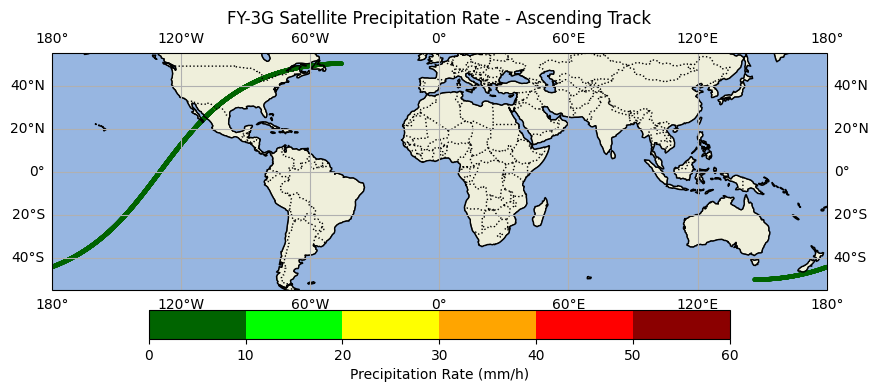

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap


# 随机生成降水率数据 (单位：mm/h)，用作色条，实际使用时应从数据文件中读取
precip_rate = geo_fields_0617_0037['precipRateNearSurface']

# 自定义颜色映射，模拟降水率的颜色变化
cmap = ListedColormap(['#006400', '#00FF00', '#FFFF00', '#FFA500', '#FF0000', '#8B0000'])

# 创建一个绘图对象，使用 Mercator 投影
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# 添加地图特征（海岸线、国家边界等）
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# 添加经纬度网格
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 绘制卫星轨迹数据
for i in range(3878):
    sc = ax.scatter(longitude[i], latitude[i], c=precip_rate[i], cmap=cmap, vmin=0, vmax=60,
                    transform=ccrs.PlateCarree(), s=10, edgecolor='none')

# 添加色条
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, shrink=0.75)
cbar.set_label('Precipitation Rate (mm/h)')

# 设置标题
plt.title("FY-3G Satellite Precipitation Rate - Ascending Track")

# 显示图形
plt.show()

